<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [54]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



/tmp/ipython-input-2873178377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='mako', order=df['type'].value_counts().index)


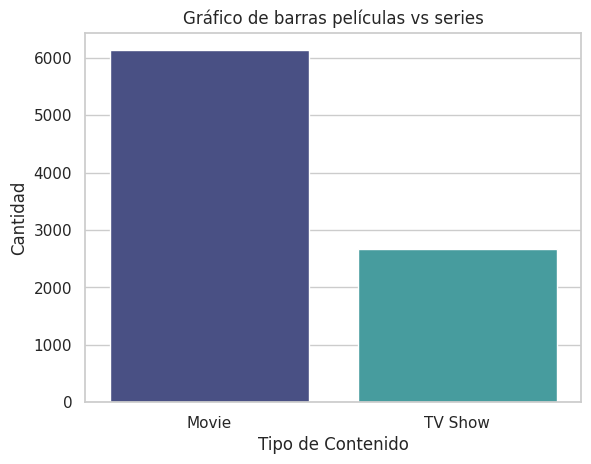

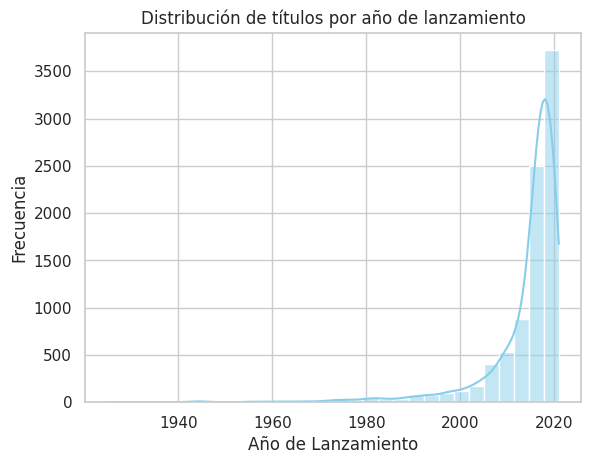

/tmp/ipython-input-2873178377.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='plasma')


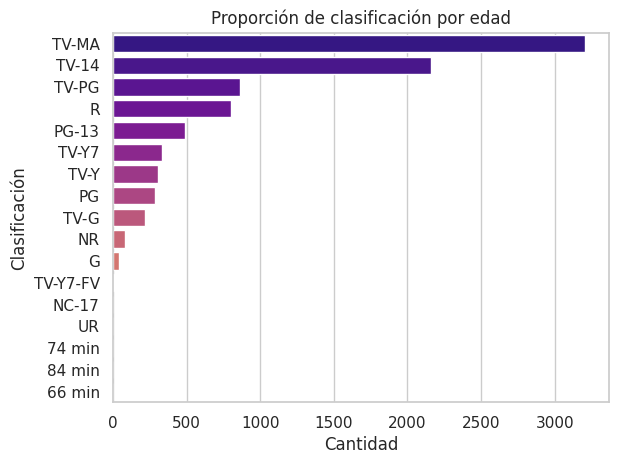

In [55]:
#1
sns.countplot(data=df, x='type', palette='mako', order=df['type'].value_counts().index)
plt.title('Gráfico de barras películas vs series')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

#2
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribución de títulos por año de lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

#3
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='plasma')
plt.title('Proporción de clasificación por edad')
plt.xlabel('Cantidad')
plt.ylabel('Clasificación')
plt.show()

1.   Predominan las películas
2.   Hay más contenido reciente. En decadas podemos notar que hay películas desde la decada de los 80
3.  La clasificación más común en TV-MA, es decir, Netflix esta más enfocado a un público adulto.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


In [56]:
#4
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['date_added'] = pd.to_datetime(df['date_added'])

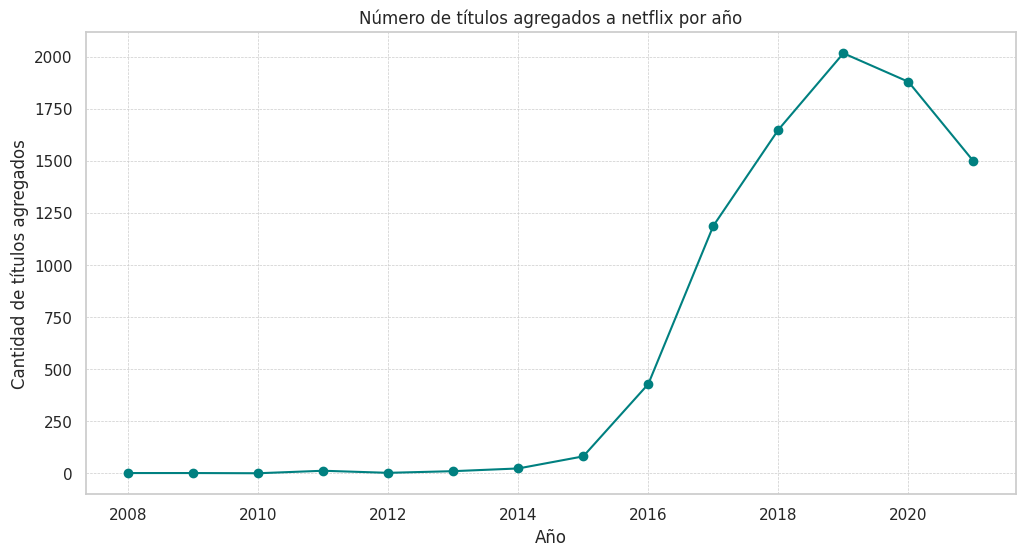

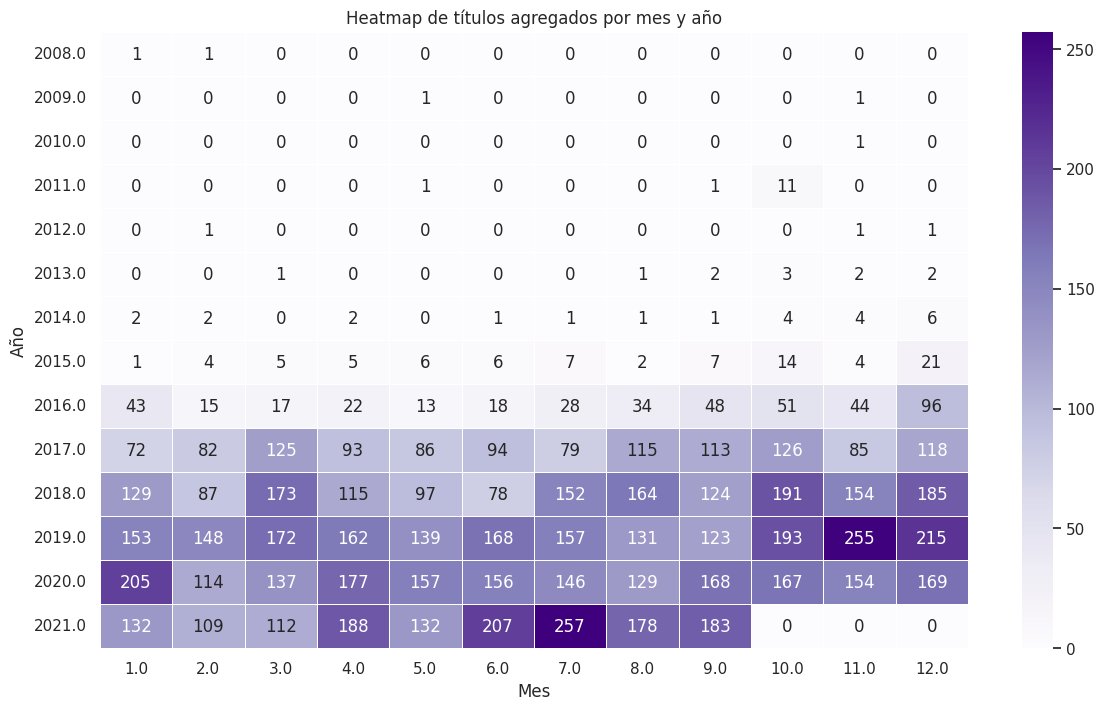

/tmp/ipython-input-1044500167.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_movies, x='duration_min', y='main_genre', order=sorted_genres, palette='coolwarm')


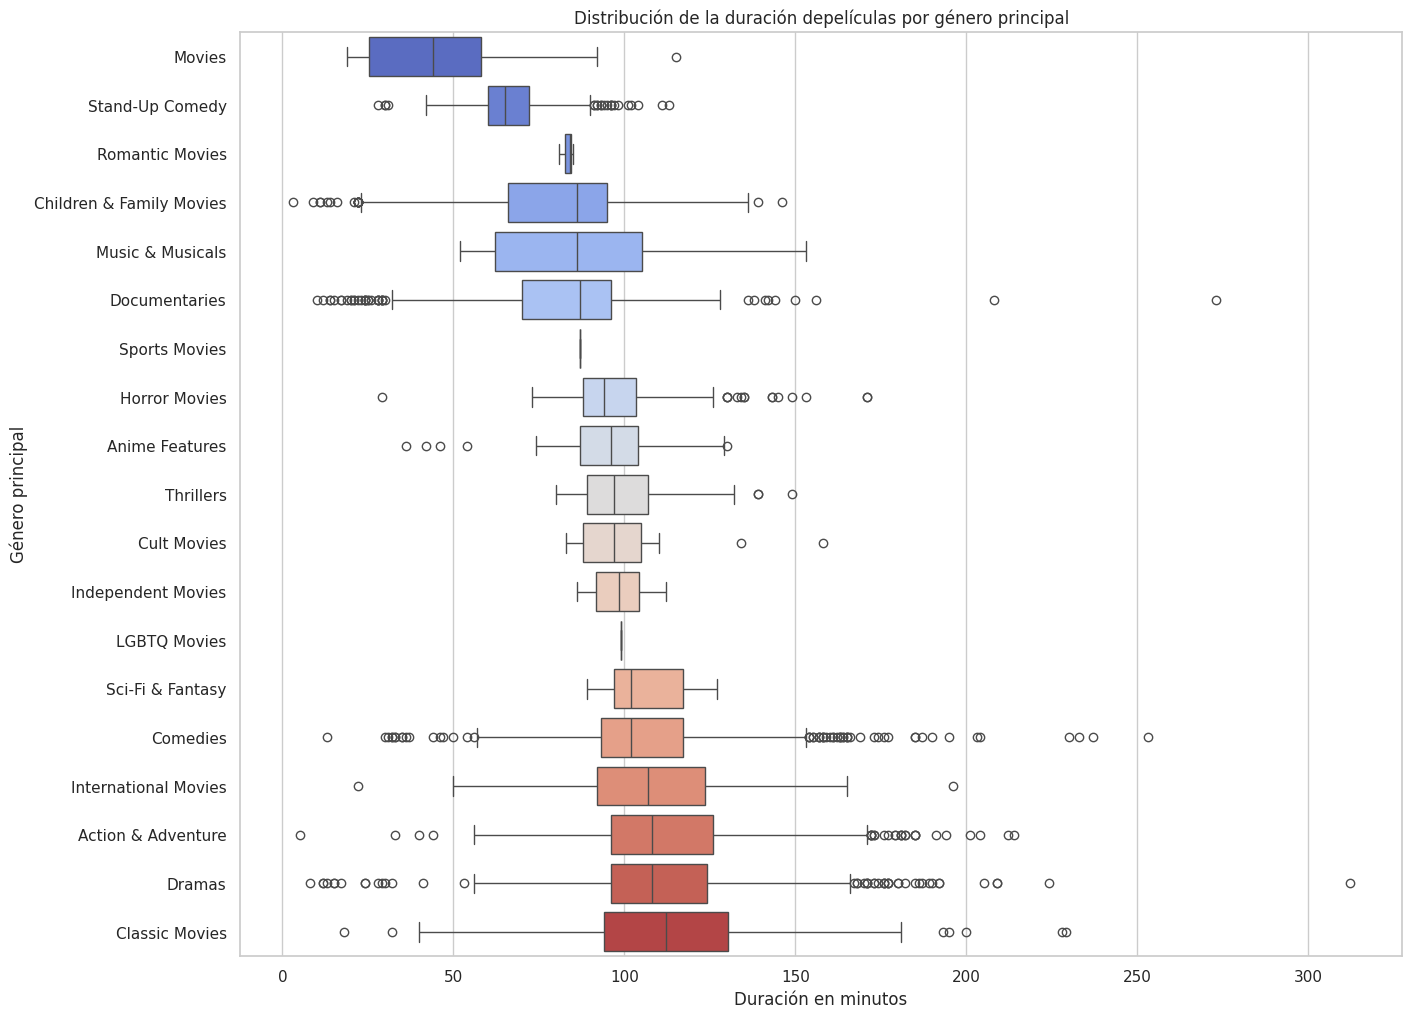

In [57]:
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
titles_per_year.plot(kind='line', marker='o', color='teal')
plt.title('Número de títulos agregados a netflix por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos agregados')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#5
df['month_added'] = df['date_added'].dt.month
heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Purples', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap de títulos agregados por mes y año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

#6
df_movies = df[df['type'] == 'Movie'].copy()
df_movies.dropna(subset=['duration'], inplace=True)
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)
df_movies['main_genre'] = df_movies['listed_in'].apply(lambda x: x.split(',')[0])

sorted_genres = df_movies.groupby('main_genre')['duration_min'].median().sort_values().index

plt.figure(figsize=(15, 12))

sns.boxplot(data=df_movies, x='duration_min', y='main_genre', order=sorted_genres, palette='coolwarm')
plt.title('Distribución de la duración depelículas por género principal')
plt.xlabel('Duración en minutos')
plt.ylabel('Género principal')
plt.show()



1.   Crecio más desde el 2016 al 2017
2.   Creo que a mitad y final de año hay más estrenos, alrededor de esos meses.
3.   En promedio las que más duran son las películas clásicas continuadas de los Dramas, Acción y Aventura y películas Internacionales.





## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-112594028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.nlargest(10).index, x=country_counts.nlargest(10).values, palette='mako')


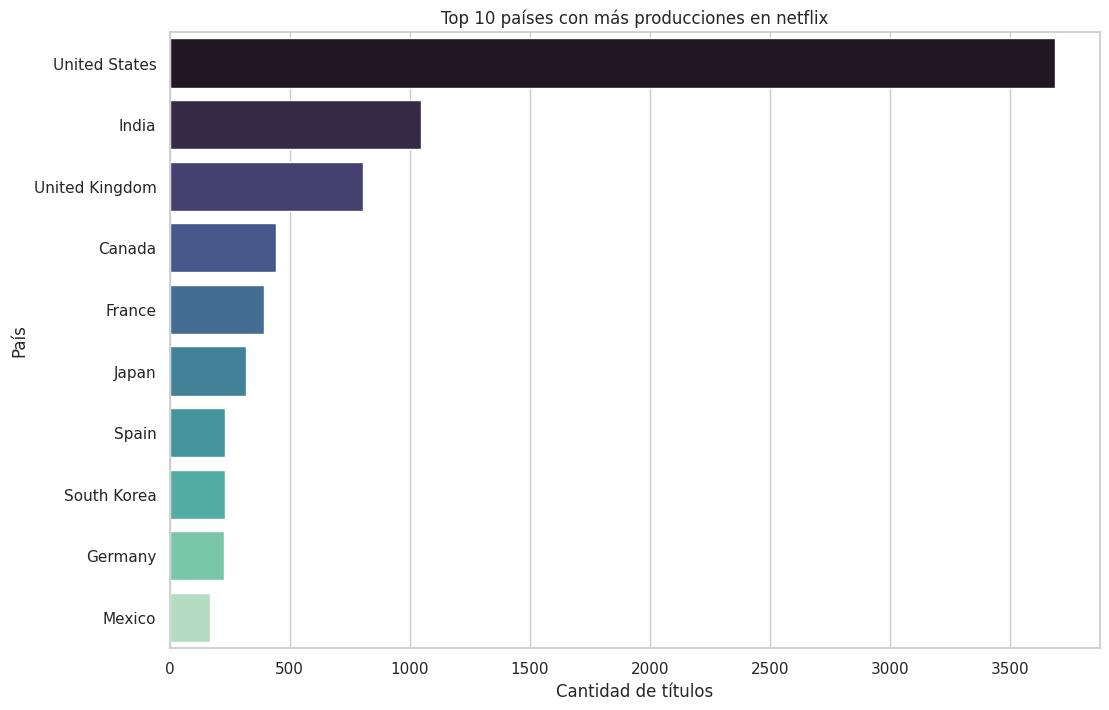

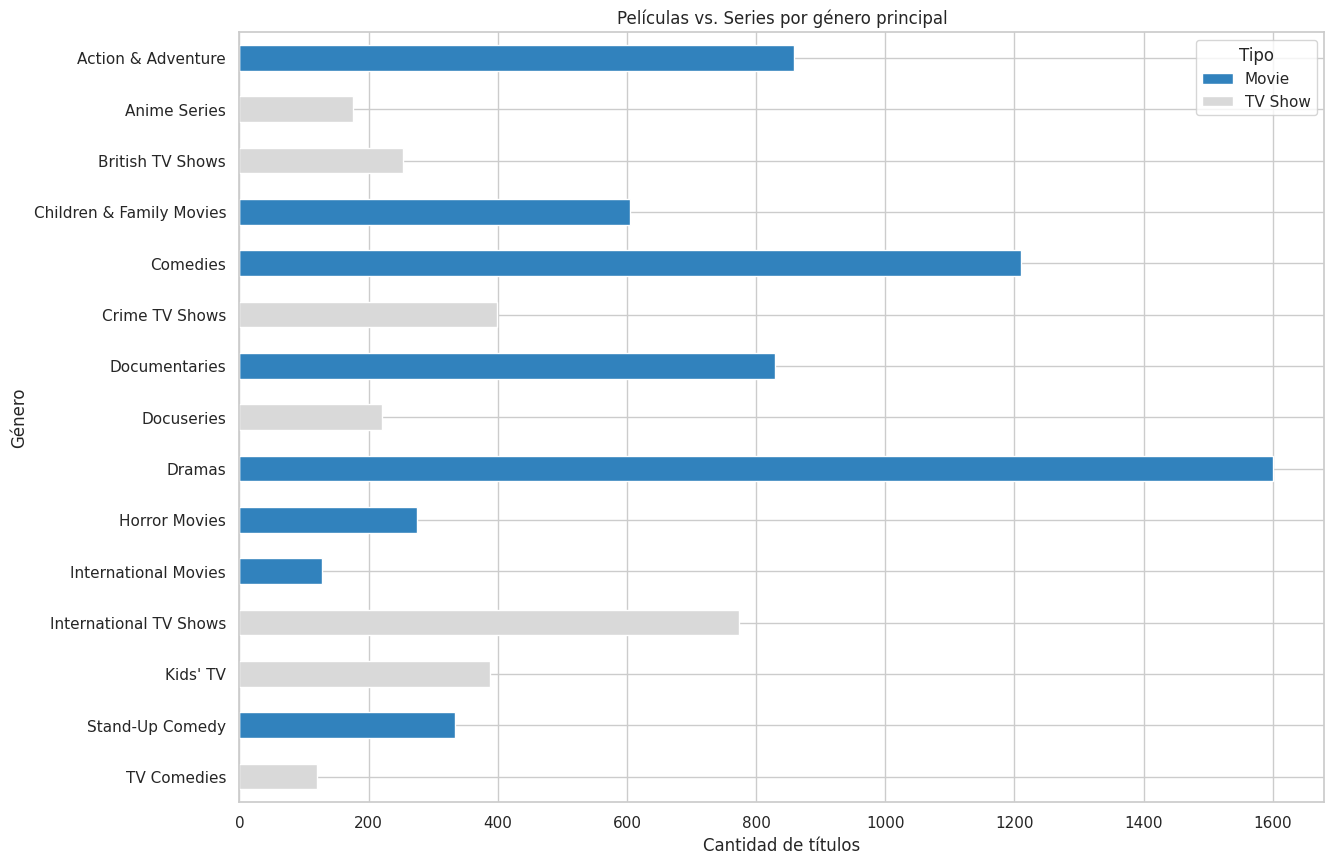

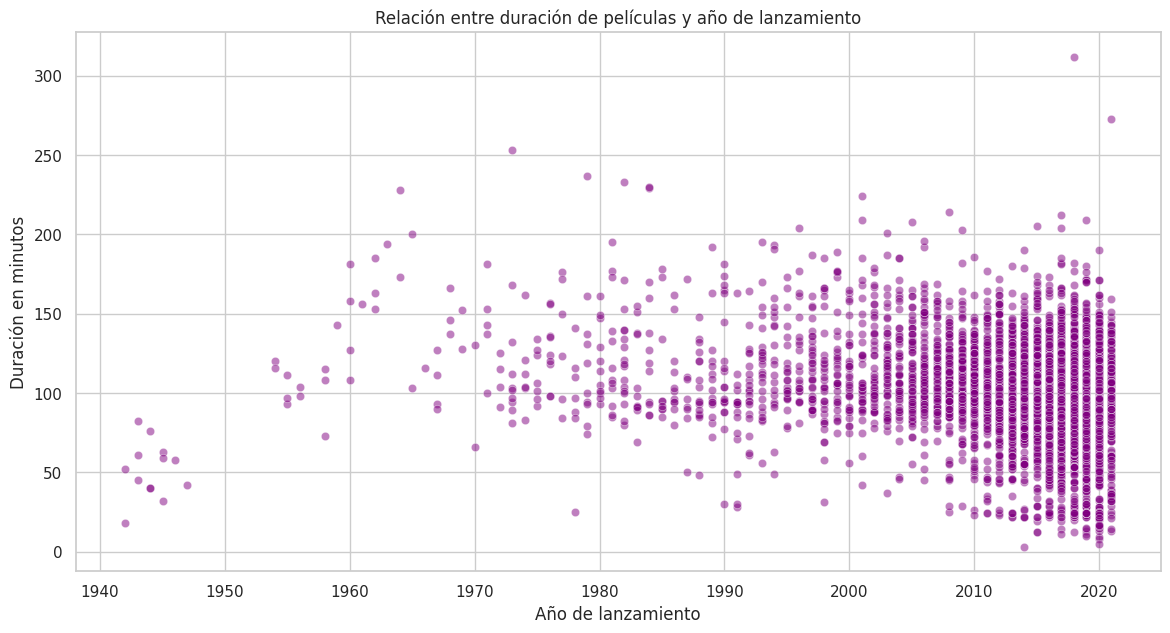

In [58]:
#7
country_counts = df.dropna(subset=['country'])['country'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.nlargest(10).index, x=country_counts.nlargest(10).values, palette='mako')
plt.title('Top 10 países con más producciones en netflix')
plt.xlabel('Cantidad de títulos')
plt.ylabel('País')
plt.show()

#8
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
top_genres_all = df['main_genre'].value_counts().nlargest(15).index
genre_type_counts = df[df['main_genre'].isin(top_genres_all)].groupby(['main_genre', 'type']).size().unstack(fill_value=0)

genre_type_counts.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='tab20c')
plt.title('Películas vs. Series por género principal')
plt.xlabel('Cantidad de títulos')
plt.ylabel('Género')
plt.legend(title='Tipo')
plt.gca().invert_yaxis()
plt.show()

#9
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_movies, x='release_year', y='duration_min', alpha=0.5, color='purple')
plt.title('Relación entre duración de películas y año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración en minutos')
plt.show()



1.   Estados Unidos, India y Reino Unido dominan el catalogo, en ese orden. La distribución es esperada.
2.   Sí existen generos más asociados a películas o series, por ejemplo hay muchas mas docuseries que documentales.
3.  Sí con el tiempo, sin contar los outliers del comienzo (decada de los 40), han ido apareciendo películas cada vez de menor duración. Respecto a los outliers, son interesantes los del comienzo, que hacen parecer que las películas antiguamente eran mucho más cortas, contrario a lo que yo personalmente me imaginaba.



## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?